In [138]:
# load a coffea file
from coffea.util import load

input="HH4b/out_parton_matching/output_all.coffea"
o = load(f"{input}")
col=o["columns"]['GluGlutoHHto4B']['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022']['hh4b_parton_matching']
print(o["cutflow"])
print(o["cutflow"]["skim"]['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022'])
print(o["cutflow"]["presel"]['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022'])
print(o["cutflow"]["hh4b_parton_matching"]['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022'])


{'initial': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': 100000}, 'skim': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': 40843}, 'presel': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': 6350}, 'hh4b_parton_matching': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 5401}}}
40843
6350
{'GluGlutoHHto4B': 5401}


In [149]:
import numpy as np
import matplotlib.pyplot as plt


def plot_histos(bins, reco, pnet, pnet_neutrino, num):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(
        reco,
        bins,
        label=f"RecoHiggs{num}Mass",
        color="blue",
        histtype="step",
        linewidth=2,
        density=True,
    )
    ax.hist(
        pnet,
        bins,
        label=f"PNetRegRecoHiggs{num}Mass",
        color="red",
        histtype="step",
        linewidth=2,
        density=True,
    )
    ax.hist(
        pnet_neutrino,
        bins,
        label=f"PNetRegNeutrinoRecoHiggs{num}Mass",
        color="green",
        histtype="step",
        linewidth=2,
        density=True,
    )
    ax.legend(loc="upper right")
    ax.text(
        0.75,
        0.5,
        "mean reco: {:.2f}\nmean pnet: {:.2f}\nmean pnet neutrino: {:.2f}\nstd dev reco: {:.2f}\nstd dev pnet: {:.2f}\nstd dev pnet neutrino: {:.2f}".format(
            np.mean(reco),
            np.mean(pnet),
            np.mean(pnet_neutrino),
            np.std(reco),
            np.std(pnet),
            np.std(pnet_neutrino),
        ),
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    plt.show()

In [99]:
print(o["columns"])
print(len(col["events_GenHiggs1Mass"].value))

{'GluGlutoHHto4B': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'hh4b_parton_matching': {'events_GenHiggs1Mass': column_accumulator(array([124.52417755, 124.47225952, 124.73596954, ..., 124.76072693,
       124.60127258, 124.65763092])), 'events_GenHiggs2Mass': column_accumulator(array([124.54808807, 124.57819366, 124.54438782, ..., 124.57772827,
       123.3385849 , 124.55459595])), 'events_RecoHiggs1Mass': column_accumulator(array([110.258255  , 115.96200562, 110.9469223 , ..., 117.92264557,
       117.1255188 , 113.84644318])), 'events_RecoHiggs2Mass': column_accumulator(array([106.65410614, 151.04466248,  87.90422821, ..., 105.53392792,
       363.15011597, 119.68573761])), 'events_PNetRegRecoHiggs1Mass': column_accumulator(array([ 99.02098083, 116.95057678, 112.76870728, ..., 113.26613617,
       121.92447662, 113.18943024])), 'events_PNetRegRecoHiggs2Mass': column_accumulator(array([110.74269104, 147.51882935,  89.32715607, ..., 105.0437088 ,
       35

In [54]:
print(col['PartonMatched_provenance'].value[:20])
print(col['PartonMatched_genPartIdxMother'].value[:20])
print(col['PartonMatched_pdgId'].value[:20])


[2. 1. 2. 1. 1. 2. 1. 2. 2. 1. 2. 1. 1. 1. 2. 2. 1. 1. 2. 2.]
[14. 13. 14. 13. 22. 23. 22. 23. 16. 15. 16. 15. 15. 15. 16. 16. 19. 19.
 20. 20.]
[-5. -5.  5.  5.  5. -5. -5.  5.  5.  5. -5. -5. -5.  5. -5.  5. -5.  5.
 -5.  5.]


In [48]:
print(len(col['PartonMatched_provenance'].value[col['PartonMatched_provenance'].value==1]))
print(len(col['PartonMatched_provenance'].value[col['PartonMatched_provenance'].value==2]))


3274
3274


In [49]:
dr1=col['JetGoodMatched_dRMatchedJet'].value
dr2=col['PartonMatched_dRMatchedJet'].value
print(dr1[dr1>0.38])
print(dr2[dr2>0.38])
len(dr1)
i=16
pnet=col['JetGoodMatched_btagPNetB'].value
print(pnet[i:i+16])


[0.38421693 0.38795206 0.39901423 0.3845118  0.39556155 0.39601389
 0.38656268 0.38627967 0.39043057 0.38141891 0.39214793 0.39544368
 0.39579782]
[0.38421693 0.38795206 0.39901423 0.3845118  0.39556155 0.39601389
 0.38656268 0.38627967 0.39043057 0.38141891 0.39214793 0.39544368
 0.39579782]
[0.99951172 0.99316406 0.96240234 0.76708984 0.99902344 0.99560547
 0.99560547 0.29931641 0.99609375 0.98779297 0.97998047 0.94091797
 0.99902344 0.99902344 0.99804688 0.79589844]


In [53]:
print(col['JetGoodMatched_btagPNetB'].value[:20])
print(col['JetGoodMatched_pt'].value[:20])
print(col['JetGoodMatched_eta'].value[:20])
print(col['JetGoodMatched_phi'].value[:20])


[0.99755859 0.9921875  0.91699219 0.4296875  0.9296875  0.87597656
 0.87060547 0.43652344 0.99951172 0.99902344 0.99316406 0.39257812
 0.99560547 0.98291016 0.69189453 0.35351562 0.99951172 0.99316406
 0.96240234 0.76708984]
[101.3125   61.65625  40.84375  68.3125   96.      124.8125  142.875
  52.40625 197.75    183.375   122.0625   56.71875  40.3125  140.125
 234.      132.125   227.125   214.      363.5     116.0625 ]
[ 0.8536377  -0.06684875  0.89318848  0.81604004  1.43310547  0.11114502
  1.89135742  1.71533203 -1.60571289 -0.03614044 -1.39794922  0.70153809
 -0.45733643  0.25946045  0.24423218  0.05757141 -0.14871216 -0.60693359
 -1.29492188 -1.55126953]
[ 0.44604492 -2.13037109 -1.4675293   2.60644531  1.16455078 -2.88476562
  0.28289795 -2.59912109  2.90380859  0.32592773 -2.73535156  0.65698242
 -2.33789062 -1.84863281  1.23217773  0.49981689 -0.5345459  -0.57714844
  2.68164062  3.04589844]


<Array [1, 2] type='2 * int64'>

In [15]:
print(col["JetGoodBTagOrderMatched_pt"].value[:16])
print(col["JetGoodBTagOrder_pt"].value[:16])
print(col["JetGood_pt"].value[:16])
print(col["JetGoodPtOrder_pt"].value[:16])
print("\n\n")
print(col["JetGoodBTagOrderMatched_btagPNetB"].value[:16])
print(col["JetGoodBTagOrder_btagPNetB"].value[:16])
print(col["JetGood_btagPNetB"].value[:16])
print(col["JetGoodPtOrder_btagPNetB"].value[:16])

[101.3125   61.65625  40.84375  68.3125   96.      124.8125  142.875
  52.40625 197.75    183.375   122.0625   56.71875  40.3125  140.125
 234.      132.125  ]
[101.3125   61.65625  40.84375  68.3125   96.      124.8125  142.875
  52.40625 197.75    183.375   122.0625   56.71875  40.3125  140.125
 234.      132.125  ]
[101.3125   61.65625  40.84375  68.3125   96.      124.8125  142.875
  52.40625 197.75    183.375   122.0625   56.71875  41.03125  62.59375
  40.3125  140.125  ]
[101.3125   68.3125   61.65625  40.84375 142.875   124.8125   96.
  52.40625 197.75    183.375   122.0625   56.71875 234.      140.125
 132.125    40.3125 ]



[0.99755859 0.9921875  0.91699219 0.4296875  0.9296875  0.87597656
 0.87060547 0.43652344 0.99951172 0.99902344 0.99316406 0.39257812
 0.99560547 0.98291016 0.69189453 0.35351562]
[0.9975586  0.9921875  0.9169922  0.4296875  0.9296875  0.87597656
 0.87060547 0.43652344 0.9995117  0.99902344 0.99316406 0.39257812
 0.99560547 0.98291016 0.69189453 0.35351562

In [16]:
print(len(col["JetGood_pt"].value))
print(len(col["JetGoodBTagOrder_pt"].value))
print(len(col["JetGoodBTagOrderMatched_pt"].value))


7708
6700
6700


In [11]:
print(o["variables"]["PNetRegRecoHiggs2Mass"]['GluGlutoHHto4B']['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022'])
histos=[]
for v in ["PNetRegRecoHiggs1Mass","RecoHiggs1Mass"]:
    histos.append(o["variables"][v]['GluGlutoHHto4B']['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022'])

Hist(
  StrCategory(['hh4b_parton_matching'], name='cat', label='Category'),
  StrCategory(['nominal'], name='variation', label='Variation'),
  Regular(30, 60, 200, name='events.PNetRegRecoHiggs2Mass', label='PNetRegRecoHiggs2Mass'),
  storage=Weight()) # Sum: WeightedSum(value=94.9339, variance=8.02138) (WeightedSum(value=95.1369, variance=8.04439) with flow)


[110.258255   115.96173859 110.94664001 ... 117.92264557 117.1255188
 113.84644318]
mean 114.06594596923937
std dev 17.548884341416464
[ 99.02098083 116.95030975 112.76870728 ... 113.26613617 121.92453766
 113.18943024]
mean 112.85848382421614
std dev 16.08254304765601
[ 95.21009827 120.45252991 123.23123932 ... 118.73760986 129.7114563
 115.2134552 ]
mean 118.70154754896835
std dev 16.962132365137926


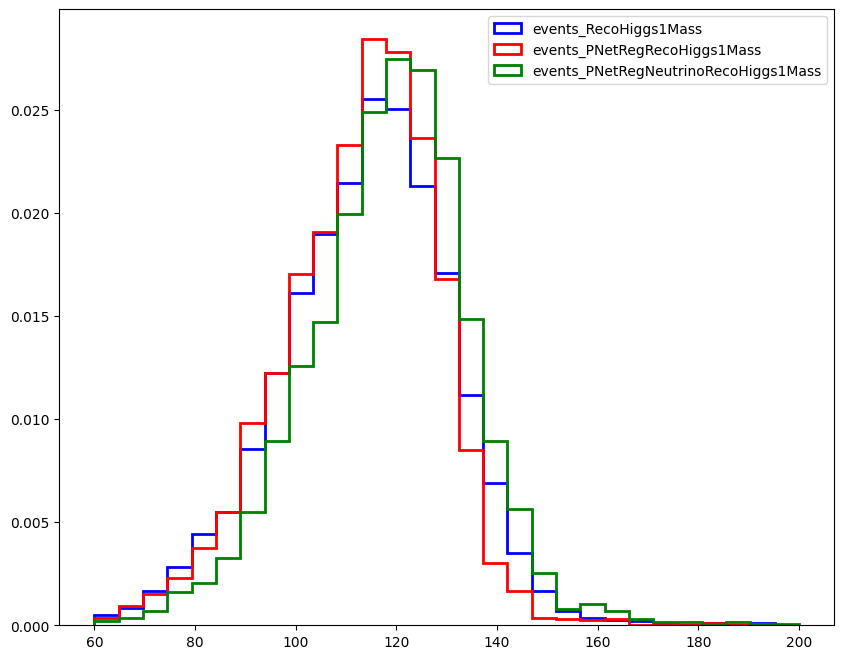

[106.65406799 151.04470825  87.90422821 ... 105.53392792 363.15045166
 119.68572998]
mean 116.20917793199195
std dev 21.927230527414682
[110.74265289 147.51882935  89.32715607 ... 105.0437088  353.13293457
 120.52001953]
mean 114.76725822509874
std dev 20.850543695123307
[137.14562988 147.3145752   92.89899445 ... 108.64877319 350.0597229
 126.00188446]
mean 120.80032888533064
std dev 22.52736872011461


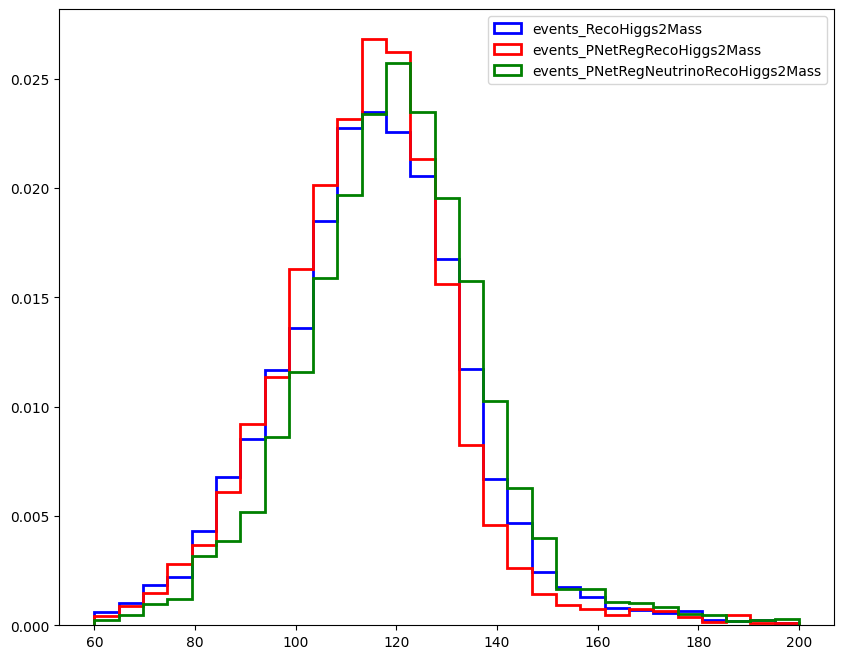

In [73]:
import matplotlib.pyplot as plt
import numpy as np
bins = np.linspace(60, 200, 30)
colors=["blue","red", "green"]
k=0

fig, ax = plt.subplots(figsize=(10,8))
for c in ["events_RecoHiggs1Mass", "events_PNetRegRecoHiggs1Mass", "events_PNetRegNeutrinoRecoHiggs1Mass"]:
    a=np.array(col[c].value)
    print(a)
    # do not fill with color
    ax.hist(a, bins, label=c, color=colors[k], histtype='step', linewidth=2, density=True)
    k+=1
    print("mean", np.mean(a))
    print("std dev", np.std(a))
ax.legend(loc='upper right')
plt.show()


k=0
fig, ax = plt.subplots(figsize=(10,8))
for c in ["events_RecoHiggs2Mass", "events_PNetRegRecoHiggs2Mass", "events_PNetRegNeutrinoRecoHiggs2Mass"]:
    a=np.array(col[c].value)
    print(a)
    # do not fill with color
    ax.hist(a, bins, label=c, color=colors[k], histtype='step', linewidth=2, density=True)
    k+=1
    print("mean", np.mean(a))
    print("std dev", np.std(a))
ax.legend(loc='upper right')
plt.show()

In [ ]:
print(len(col["events_RecoHiggs1Mass"].value))
print(len(col["events_RecoHiggs2Mass"].value))
print(len(col["events_PNetRegRecoHiggs1Mass"].value))
print(len(col["events_PNetRegRecoHiggs2Mass"].value))
higgs_mass=np.concatenate((col["events_RecoHiggs1Mass"].value, col["events_RecoHiggs2Mass"].value))
pnet_higgs_mass=np.concatenate((col["events_PNetRegRecoHiggs1Mass"].value, col["events_PNetRegRecoHiggs2Mass"].value))
pnet_neutrino_higgs_mass=np.concatenate((col["events_PNetRegNeutrinoRecoHiggs1Mass"].value, col["events_PNetRegNeutrinoRecoHiggs2Mass"].value))
print(len(higgs_mass))
print(len(pnet_higgs_mass))
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(higgs_mass, bins, label="RecoHiggsMass", color="blue", histtype='step', linewidth=2, density=True)
ax.hist(pnet_higgs_mass, bins, label="PNetRegRecoHiggsMass", color="red", histtype='step', linewidth=2, density=True)
ax.hist(pnet_neutrino_higgs_mass, bins, label="PNetRegNeutrinoRecoHiggsMass", color="green", histtype='step', linewidth=2, density=True)
ax.legend(loc='upper right')
plt.show()
print(higgs_mass)

#average mass
print("mean reco", np.mean(higgs_mass))
print("mean pnet",np.mean(pnet_higgs_mass))
print("mean pnet nutrino",np.mean(pnet_neutrino_higgs_mass))

#std dev
print("std dev reco",np.std(higgs_mass))
print("std dev pnet",np.std(pnet_higgs_mass))
print("std dev pnet neutrino",np.std(pnet_neutrino_higgs_mass))


In [141]:
print(col["events_GenHiggs1Pt"].value)
print(col["events_GenHiggs2Pt"].value)
print(col["events_RecoHiggs1Pt"].value)
print(col["events_RecoHiggs2Pt"].value)
print(col["events_PNetRegRecoHiggs1Pt"].value)
print(col["events_PNetRegRecoHiggs2Pt"].value)
print(col["events_PNetRegNeutrinoRecoHiggs1Pt"].value)
print(col["events_PNetRegNeutrinoRecoHiggs2Pt"].value)

for type_jet in ["Gen", "Reco", "PNetRegReco", "PNetRegNeutrinoReco"]:
    print(type_jet, len(col[f"events_{type_jet}Higgs1Pt"].value[col[f"events_{type_jet}Higgs1Pt"].value>=col[f"events_{type_jet}Higgs2Pt"].value]))
    print(type_jet, len(col[f"events_{type_jet}Higgs1Pt"].value[col[f"events_{type_jet}Higgs1Pt"].value<=col[f"events_{type_jet}Higgs2Pt"].value]))
    # print(type_jet, (col[f"events_{type_jet}Higgs2Pt"].value[col[f"events_{type_jet}Higgs1Pt"].value<=col[f"events_{type_jet}Higgs2Pt"].value]))


[118.61804199 228.04626465 332.8656311  ... 252.51539612 283.49142456
 295.80871582]
[116.05182648 128.65933228 278.2427063  ... 208.54173279 204.8293457
 232.16917419]
[ 93.13345337 216.96226501 304.31842041 ... 236.12132263 267.82919312
 264.81442261]
[ 95.66004181 175.71684265 237.7298584  ... 180.36341858 439.78485107
 219.94198608]
[ 84.24796295 217.93363953 305.63711548 ... 229.62289429 279.23861694
 263.28271484]
[ 95.59273529 174.49353027 238.45690918 ... 179.87263489 432.52062988
 223.30274963]
[ 91.72196198 222.79043579 334.56497192 ... 245.50358582 285.84625244
 269.82589722]
[118.54937744 178.40116882 243.42630005 ... 187.71434021 441.41342163
 230.9981842 ]
Gen 5382
Gen 19
Reco 4023
Reco 1378
PNetRegReco 4092
PNetRegReco 1309
PNetRegNeutrinoReco 4156
PNetRegNeutrinoReco 1245


[ 93.13345337 216.96226501 304.31842041 ... 236.12132263 267.82919312
 264.81442261]
[ 95.66004181 175.71684265 237.7298584  ... 180.36341858 439.78485107
 219.94198608]
[110.258255   115.96200562 110.9469223  ... 117.92264557 117.1255188
 113.84644318]
[106.65410614 151.04466248  87.90422821 ... 105.53392792 363.15011597
 119.68573761]
[106.65410614 115.96200562 110.9469223  ... 117.92264557 363.15011597
 113.84644318]
[110.258255   151.04466248  87.90422821 ... 105.53392792 117.1255188
 119.68573761]
[ 99.02098083 116.95057678 112.76870728 ... 113.26613617 121.92447662
 113.18943024]
[110.74268341 147.51882935  89.32715607 ... 105.0437088  353.13259888
 120.52004242]
[105.87376404 119.42688751 121.12442017 ... 123.65827942 124.49943542
 115.8832016 ]
[132.0198822  150.8288269   91.40312195 ... 109.15518188 359.95849609
 125.1251297 ]


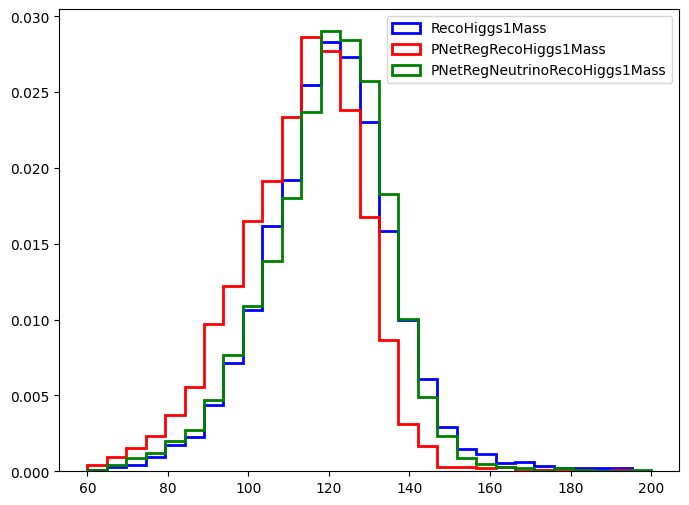

mean reco 120.49849073031814
mean pnet 112.89808835102174
mean pnet neutrino 119.6106084729318
std dev reco 17.49217607848432
std dev pnet 15.996743937344993
std dev pnet neutrino 16.026250009530916


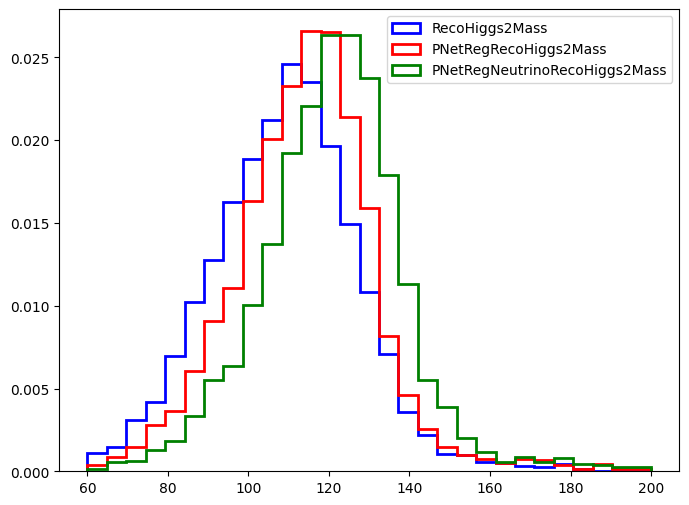

mean reco 109.79858187608555
mean pnet 114.87356048256264
mean pnet neutrino 121.94546200491459
std dev reco 20.606951640463148
std dev pnet 20.86556616989393
std dev pnet neutrino 21.411209996380073


[89.45117188]
[106.38858795]
[122.77397156]


In [143]:
# oirder higgs 1 and 2 based on the reco higgs pt
print(col["events_RecoHiggs1Pt"].value)
print(col["events_RecoHiggs2Pt"].value)

higgs1_mass_order = np.where(
    col["events_RecoHiggs1Pt"].value >= col["events_RecoHiggs2Pt"].value,
    col["events_RecoHiggs1Mass"].value,
    col["events_RecoHiggs2Mass"].value,
)
higgs2_mass_order = np.where(
    col["events_RecoHiggs1Pt"].value >= col["events_RecoHiggs2Pt"].value,
    col["events_RecoHiggs2Mass"].value,
    col["events_RecoHiggs1Mass"].value,
)
pnet_higgs1_mass_order = np.where(
    col["events_RecoHiggs1Pt"].value >= col["events_RecoHiggs1Pt"].value,
    col["events_PNetRegRecoHiggs1Mass"].value,
    col["events_PNetRegRecoHiggs2Mass"].value,
)
pnet_higgs2_mass_order = np.where(
    col["events_RecoHiggs1Pt"].value >= col["events_RecoHiggs1Pt"].value,
    col["events_PNetRegRecoHiggs2Mass"].value,
    col["events_PNetRegRecoHiggs1Mass"].value,
)
pnet_neutrino_higgs1_mass_order = np.where(
    col["events_RecoHiggs1Pt"].value >= col["events_RecoHiggs1Pt"].value,
    col["events_PNetRegNeutrinoRecoHiggs1Mass"].value,
    col["events_PNetRegNeutrinoRecoHiggs2Mass"].value,
)
pnet_neutrino_higgs2_mass_order = np.where(
    col["events_RecoHiggs1Pt"].value >= col["events_RecoHiggs1Pt"].value,
    col["events_PNetRegNeutrinoRecoHiggs2Mass"].value,
    col["events_PNetRegNeutrinoRecoHiggs1Mass"].value,
)


higg1_mass = np.array(col["events_RecoHiggs1Mass"].value)
higg2_mass = np.array(col["events_RecoHiggs2Mass"].value)
print(higg1_mass)
print(higg2_mass)
print(higgs1_mass_order)
print(higgs2_mass_order)
print(pnet_higgs1_mass_order)
print(pnet_higgs2_mass_order)
print(pnet_neutrino_higgs1_mass_order)
print(pnet_neutrino_higgs2_mass_order)

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(
    higgs1_mass_order,
    bins,
    label="RecoHiggs1Mass",
    color="blue",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_higgs1_mass_order,
    bins,
    label="PNetRegRecoHiggs1Mass",
    color="red",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_neutrino_higgs1_mass_order,
    bins,
    label="PNetRegNeutrinoRecoHiggs1Mass",
    color="green",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.legend(loc="upper right")
plt.show()



print("mean reco", np.mean(higgs1_mass_order))
print("mean pnet", np.mean(pnet_higgs1_mass_order))
print("mean pnet neutrino", np.mean(pnet_neutrino_higgs1_mass_order))
print("std dev reco", np.std(higgs1_mass_order))
print("std dev pnet", np.std(pnet_higgs1_mass_order))
print("std dev pnet neutrino", np.std(pnet_neutrino_higgs1_mass_order))

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(
    higgs2_mass_order,
    bins,
    label="RecoHiggs2Mass",
    color="blue",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_higgs2_mass_order,
    bins,
    label="PNetRegRecoHiggs2Mass",
    color="red",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_neutrino_higgs2_mass_order,
    bins,
    label="PNetRegNeutrinoRecoHiggs2Mass",
    color="green",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.legend(loc="upper right")
plt.show()

print("mean reco", np.mean(higgs2_mass_order))
print("mean pnet", np.mean(pnet_higgs2_mass_order))
print("mean pnet neutrino", np.mean(pnet_neutrino_higgs2_mass_order))
print("std dev reco", np.std(higgs2_mass_order))
print("std dev pnet", np.std(pnet_higgs2_mass_order))
print("std dev pnet neutrino", np.std(pnet_neutrino_higgs2_mass_order))


mask_mass_order = pnet_neutrino_higgs1_mass_order > pnet_higgs1_mass_order
# & (
#     pnet_neutrino_higgs1_mass_order > higg1_mass
# )
print("\n")
print(pnet_neutrino_higgs1_mass_order[~mask_mass_order])
print(pnet_higgs1_mass_order[~mask_mass_order])
print(higg1_mass[~mask_mass_order])

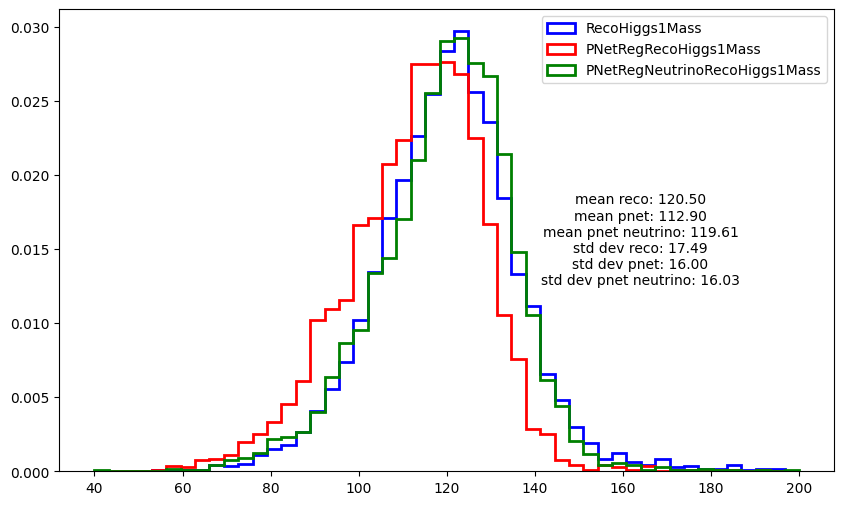

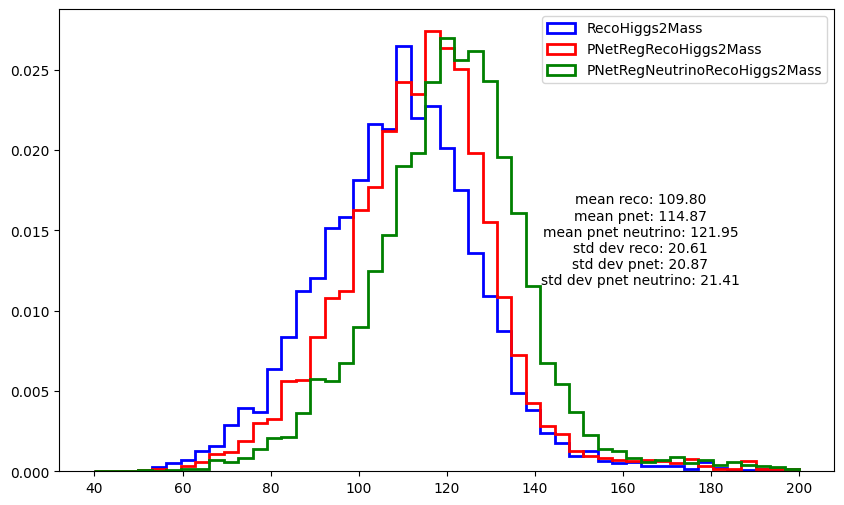

In [154]:
bins=np.linspace(40, 200, 50)
plot_histos(bins, higgs1_mass_order, pnet_higgs1_mass_order, pnet_neutrino_higgs1_mass_order, 1)
plot_histos(bins, higgs2_mass_order, pnet_higgs2_mass_order, pnet_neutrino_higgs2_mass_order, 2)

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[0.88543652 0.93162931 0.88945412 ... 0.94519043 0.94000259 0.91327296]
[0.85632873 1.21244865 0.70580642 ... 0.84713319 2.94433503 0.96090985]
[0.79519482 0.93957141 0.90405925 ... 0.90786691 0.97851711 0.90800242]
[0.88915603 1.18414648 0.71723148 ... 0.84319814 2.86311538 0.96760815]
[0.85022657 0.95946589 0.97104645 ... 0.99116351 0.9991827  0.92961178]
[1.05999124 1.21071612 0.73389997 ... 0.87620142 2.91845813 1.00458059]


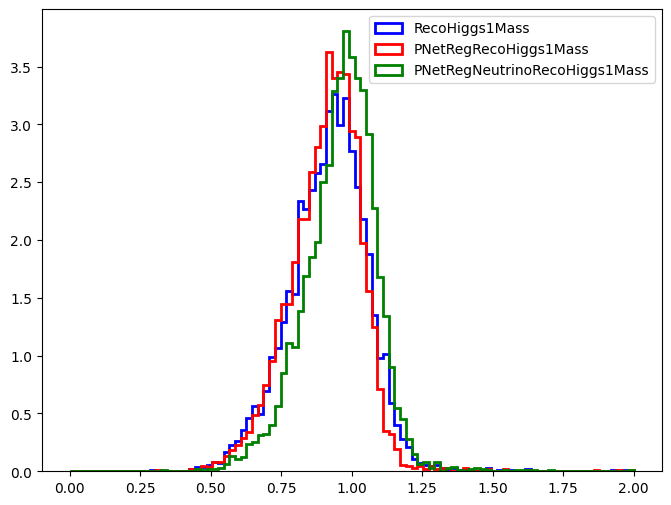

mean reco 0.9158117833204316
mean pnet 0.9064615239517344
mean pnet nutrino 0.9603549593483439
std dev reco 0.14053581315239946
std dev pnet 0.12855374984667117
std dev pnet neutrino 0.1287919596131569


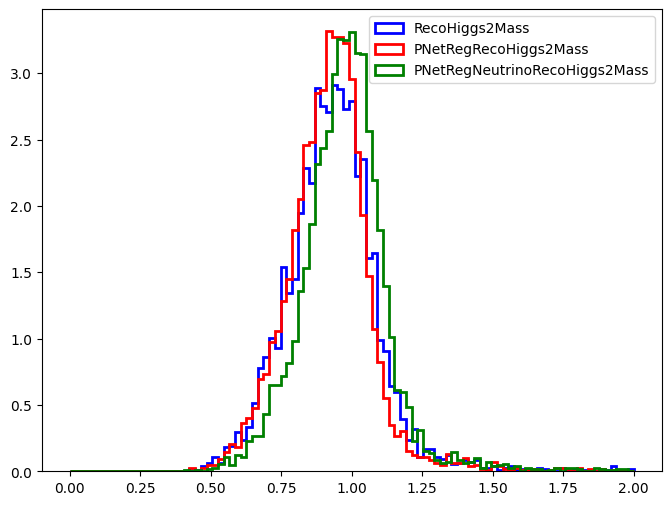

mean reco 0.9332144268937802
mean pnet 0.9222852080112941
mean pnet nutrino 0.9790625651467257
std dev reco 0.17610857640941344
std dev pnet 0.16780363992659186
std dev pnet neutrino 0.17220011265067536


In [135]:
bins_ratio = np.linspace(0, 2, 100)
mask_pt1=np.array(col["events_RecoHiggs1Pt"].value>=100) & np.array(col["events_RecoHiggs1Pt"].value<=200)
mask_pt2=np.array(col["events_RecoHiggs2Pt"].value>=100) & np.array(col["events_RecoHiggs2Pt"].value<=200)

mask_pt1=np.ones_like(col["events_RecoHiggs1Pt"].value).astype(bool)
mask_pt2=np.ones_like(col["events_RecoHiggs2Pt"].value).astype(bool)
print(mask_pt1)
print(mask_pt2)
gen_higgs_mass1 = np.array(col["events_GenHiggs1Mass"].value[mask_pt1])
gen_higgs_mass2 = np.array(col["events_GenHiggs2Mass"].value[mask_pt2])
reco_ratio1 = np.array(col["events_RecoHiggs1Mass"].value[mask_pt1]) / gen_higgs_mass1
reco_ratio2 = np.array(col["events_RecoHiggs2Mass"].value[mask_pt2]) / gen_higgs_mass2
pnet_ratio1 = np.array(col["events_PNetRegRecoHiggs1Mass"].value[mask_pt1]) / gen_higgs_mass1
pnet_ratio2 = np.array(col["events_PNetRegRecoHiggs2Mass"].value[mask_pt2]) / gen_higgs_mass2
pnet_neutrino_ratio1 = (
    np.array(col["events_PNetRegNeutrinoRecoHiggs1Mass"].value[mask_pt1]) / gen_higgs_mass1
)
pnet_neutrino_ratio2 = (
    np.array(col["events_PNetRegNeutrinoRecoHiggs2Mass"].value[mask_pt2]) / gen_higgs_mass2
)

print(reco_ratio1)
print(reco_ratio2)
print(pnet_ratio1)
print(pnet_ratio2)
print(pnet_neutrino_ratio1)
print(pnet_neutrino_ratio2)

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(
    reco_ratio1,
    bins_ratio,
    label="RecoHiggs1Mass",
    color="blue",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_ratio1,
    bins_ratio,
    label="PNetRegRecoHiggs1Mass",
    color="red",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_neutrino_ratio1,
    bins_ratio,
    label="PNetRegNeutrinoRecoHiggs1Mass",
    color="green",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.legend(loc="upper right")
plt.show()
print("mean reco", np.mean(reco_ratio1))
print("mean pnet", np.mean(pnet_ratio1))
print("mean pnet nutrino", np.mean(pnet_neutrino_ratio1))
print("std dev reco", np.std(reco_ratio1))
print("std dev pnet", np.std(pnet_ratio1))
print("std dev pnet neutrino", np.std(pnet_neutrino_ratio1))


fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(
    reco_ratio2,
    bins_ratio,
    label="RecoHiggs2Mass",
    color="blue",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_ratio2,
    bins_ratio,
    label="PNetRegRecoHiggs2Mass",
    color="red",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_neutrino_ratio2,
    bins_ratio,
    label="PNetRegNeutrinoRecoHiggs2Mass",
    color="green",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.legend(loc="upper right")
plt.show()
print("mean reco", np.mean(reco_ratio2))
print("mean pnet", np.mean(pnet_ratio2))
print("mean pnet nutrino", np.mean(pnet_neutrino_ratio2))

print("std dev reco", np.std(reco_ratio2))
print("std dev pnet", np.std(pnet_ratio2))
print("std dev pnet neutrino", np.std(pnet_neutrino_ratio2))